# Notes for SC1015

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Pandas DataFrame

In [2]:
canteens_dict = {"Name" : ["North Spine", "Koufu", "Canteen 9", "North Hill", "Canteen 11"],
                 "Stalls" : [20, 15, 10, 12, 8],
                 "Rating" : [4.5, 4.2, 4.0, 3.7, 4.2]
                }

canteens_df = pd.DataFrame(canteens_dict)
canteens_df

,Name,Stalls,Rating
0,North Spine,20,4.5
1,Koufu,15,4.2
2,Canteen 9,10,4.0
3,North Hill,12,3.7
4,Canteen 11,8,4.2


In [3]:
canteens_df["Name"]

0    North Spine
1          Koufu
2      Canteen 9
3     North Hill
4     Canteen 11
Name: Name, dtype: object

In [4]:
canteens_df.iloc[0]

Name      North Spine
Stalls             20
Rating            4.5
Name: 0, dtype: object

# Import file into a DataFrame
csv_data = pd.read_csv('somedata.csv', header = None)

csv_data.head()

txt_data = pd.read_table('somedata.txt', sep = "\s+", header = None)

txt_data.head()

xls_data = pd.read_excel('somedata.xlsx', sheet_name = 'Sheet1', header = None)

xls_data.head()

json_data = pd.read_json('somedata.json')

json_data.head()

html_data = pd.read_html('http://www.imdb.com/title/tt0441773/fullcredits/?ref_=tt_ov_st_sm')

html_data[2].head()

print("Data type : ", type(csv_data)) - keyword type

print("Data dims : ", csv_data.shape) - keyword .shape

print("HTML tables : ", len(html_data)) -for html only

print(pkmndata.dtypes) - checking data types

hp = pd.DataFrame(pkmndata['HP']) - extract single variable

print("Data dims : ", hp.size) - number of rows of single variable

# Summary Statistics
hp.describe().round(2) - Obtaining statistics of the dataframe, .round(2) helps to round off to 2dp

f = plt.figure(figsize=(24, 4)) - setting the axis for diagrams later, x against y

sb.boxplot(data = hp, orient = "h") - plotting boxplot

sb.histplot(data = hp) - plotting histogram

sb.kdeplot(data = hp) - plotting kernel density extimate diagram

sb.histplot(data = hp, kde = True) - combination of kde and histogram

sb.violinplot(data = hp, orient = "h") -violin plot


# Plotting multiple graphs at one go - ax to locate the graph 
f, axes = plt.subplots(2, 3, figsize=(24, 12)) -setting the number of rows and columns of graph and size

## Plot the basic uni-variate figures for HP - ax to locate the graph 
sb.boxplot(data = hp, orient = "h", ax = axes[0,0]) 

sb.histplot(data = hp, ax = axes[0,1])

sb.violinplot(data = hp, orient = "h", ax = axes[0,2])

## Plot the basic uni-variate figures for Attack
sb.boxplot(data = attack, orient = "h", ax = axes[1,0])

sb.histplot(data = attack, ax = axes[1,1])

sb.violinplot(data = attack, orient = "h", ax = axes[1,2])

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([attack, hp], axis = 1).reindex(attack.index)

jointDF


# Create a joinplot

sb.jointplot(data = jointDF, x = "Attack", y = "HP", height = 12)

# Calculate Correlation
jointDF.corr()

f = plt.figure(figsize=(12, 12))

sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f") - drawing out a heatmap

# Multi-Variate of Multiple graphs
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0

for var in numDF:

    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    
    sb.histplot(data = numDF[var], ax = axes[count,1])
    
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    
    count += 1

# Drawing pairs of variables against one another
sb.pairplot(data = numDF)

# Information about the variables
pkmndata.info() -tells about the data types, index, number of null items and memory etc.

print("Number of Generations :", len(pkmndata["Generation"].unique())) -prints out number of unqiue data under Generation(6 generations therefore print out 6)

print(pkmndata["Generation"].value_counts()) - prints out number of pokemons for each generation

print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique())) -dropna actually helps to remove those NULL

sb.catplot(y = "Generation", data = pkmndata, kind = "count") - category plot for number of pokemons for each generation

singletype_data = pkmndata[pkmndata["Type 2"].isnull()] - creating another data frame that has only one type

dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False] - creating data frame for pokemons with dual types

sb.catplot(y = 'Type 1', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8) -drawing multiple category plot for each generation 


# Plotting a heatmap for pokemons
f = plt.figure(figsize=(20, 20))

sb.heatmap(dualtype_data.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
 
This plot a heatmap with y axis for first type and x axis for second type, the density of colour represents the number of pokemons for each category

# Distribution of the Two Types over Generations
f, axes = plt.subplots(3, 2, figsize=(20, 30))

dualtype_gen1 = dualtype_data[dualtype_data["Generation"] == 1]

dualtype_gen2 = dualtype_data[dualtype_data["Generation"] == 2]

dualtype_gen3 = dualtype_data[dualtype_data["Generation"] == 3]

dualtype_gen4 = dualtype_data[dualtype_data["Generation"] == 4]

dualtype_gen5 = dualtype_data[dualtype_data["Generation"] == 5]

dualtype_gen6 = dualtype_data[dualtype_data["Generation"] == 6]

sb.heatmap(dualtype_gen1.groupby(['Type 1', 'Type 2']).size().unstack(),

           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
           
sb.heatmap(dualtype_gen2.groupby(['Type 1', 'Type 2']).size().unstack(), 

           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
           
sb.heatmap(dualtype_gen3.groupby(['Type 1', 'Type 2']).size().unstack(), 

           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])
           
sb.heatmap(dualtype_gen4.groupby(['Type 1', 'Type 2']).size().unstack(), 

           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,1])
           
sb.heatmap(dualtype_gen5.groupby(['Type 1', 'Type 2']).size().unstack(), 

           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,0])
           
sb.heatmap(dualtype_gen6.groupby(['Type 1', 'Type 2']).size().unstack(), 

           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,1])

# Pokemons with Duplicate IDs
dupid_data = pkmndata[pkmndata.duplicated("#", keep = False)]

dupid_data.sort_values(by = "Name").head(n = 20) 

print("Pokemons with Duplicate IDs :", len(dupid_data))

dupids = dupid_data["#"].unique()

print("Unique Pokemons with DupIDs :", len(dupids))

# Group Pokemons with same ID
print("# \t Count \t List of Pokemons with Duplicate IDs")


for dupid in dupids:

    dupid_list = list(dupid_data[dupid_data["#"] == dupid]["Name"])
    
    print(dupid, "\t", len(dupid_list), "\t", dupid_list)

# Clean the Data Set
### Create a copy of the Dataset
pkmndata_clean = pkmndata.copy()

### Rename "#" to "ID" of Pokemon
pkmndata_clean.rename(columns = {'#': 'ID'}, inplace = True)

### Convert all Variable Names to UPPERCASE
pkmndata_clean.columns = pkmndata_clean.columns.str.upper()

### Remove all spaces and dots from Variable Names
pkmndata_clean.columns = pkmndata_clean.columns.str.replace(".","")
pkmndata_clean.columns = pkmndata_clean.columns.str.replace(" ","_")

### Print the Variable Information to check
pkmndata_clean.info()

# Fix Pokemon Names
Convert [Name]Mega [Name] to [Name]Mega

Convert [Name]Mega [Name] X to [Name]MegaX

Convert [Name]Mega [Name] Y to [Name]MegaY

Convert [Name][Form] Forme to [Name][Form]

Convert [Name][Cloak] Cloak to [Name][Cloak]

Convert [Name][Rotom] Rotom to [Name][Rotom]

Convert [Name][Size] Size to [Name][Size]

Convert HoopaHoopa [Form] to Hoopa[Form]

import re

### Fix names with extra Extensions
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Forme)',r'\1', x))

pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Cloak)',r'\1', x))

pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Rotom)',r'\1', x))

pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Size)',r'\1', x))

pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(Hoopa)(.+)',r'\2', x))

### Fix names with Mega in between
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+Mega)(.+)',r'\1', x))

### Remove Blanks from all the Names
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'\s+','', x))



# Print out the adjusted data frame and identify those have not been changed
### Pokemons with Duplicate IDs
dupid_data_clean = pkmndata_clean[pkmndata_clean.duplicated("ID", keep = False)]

print("Pokemons with Duplicate IDs :", len(dupid_data_clean))

dupids_clean = dupid_data_clean["ID"].unique()

print("Unique Pokemons with DupIDs :", len(dupids_clean))

print()

### Group Pokemons with same ID
print("# \t Count \t List of Pokemons with Duplicate IDs")

for dupid_clean in dupids_clean:

    dupid_list_clean = list(dupid_data_clean[dupid_data_clean["ID"] == dupid_clean]["NAME"])
    
    print(dupid_clean, "\t", len(dupid_list_clean), "\t", dupid_list_clean)

# Manually changing the names one by one
### X,Y labels missing for Charizard (6) and Mewtwo (150)
print(pkmndata_clean[pkmndata_clean["ID"] == 6]["NAME"])

print(pkmndata_clean[pkmndata_clean["ID"] == 150]["NAME"])
### Fix the X,Y labels for Charizard and Mewtwo
pkmndata_clean.loc[7,"NAME"] = "CharizardMegaX"

pkmndata_clean.loc[8,"NAME"] = "CharizardMegaY"

pkmndata_clean.loc[163,"NAME"] = "MewtwoMegaX"

pkmndata_clean.loc[164,"NAME"] = "MewtwoMegaY"


# Set NAME as the Index of the DataFrame
pkmndata_clean = pkmndata_clean.set_index('NAME')

# Locate pokemons that are required
pkmndata_clean.loc[["Pikachu", "Jigglypuff", "Togepi", "Bulbasaur", "Snorlax"]]

# Strongest Pokemons -- the Top 10
pkmndata_clean.sort_values('TOTAL', ascending=False).head(10)
# Weakest Pokemons -- the Bottom 10
pkmndata_clean.sort_values('TOTAL', ascending=True).head(10)

# Strongest Legendary Pokemons -- the Top 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].sort_values('TOTAL', ascending=False).head(10)

# Strongest Pokemons in each Generation -- the Top 10
generation = 1

pkmndata_clean[pkmndata_clean["GENERATION"] == generation].sort_values('TOTAL', ascending=False).head(10)

# Strength of Pokemons over various Types
### Compute the Average TOTAL across every pair of TYPEs
total_means = pkmndata_clean.groupby(['TYPE_1', 'TYPE_2']).mean().loc[:, 'TOTAL']
### Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('TOTAL', ascending=False).head(10).round(2))
### Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")

# Strength of Legendary Pokemons over various Types
### Compute the Average TOTAL across every pair of TYPEs
total_means = pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].groupby(['TYPE_1', 'TYPE_2']).mean().loc[:, 'TOTAL']
### Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('TOTAL', ascending=False).head(10).round(2))
### Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")

# Tackle the Missing Values
### Check missing values in data
pkmndata_clean.isnull().sum()
### Fill missing values in data
pkmndata_clean["TYPE_2"].fillna(value = "NoType", inplace = True)
### Check the Clean Dataset
pkmndata_clean.info()
### Check the Variable Information
print(pkmndata_clean["TYPE_2"].dropna().value_counts())

# Uni-Variate Linear Regression

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP**    

> Regression Model : Total = $a$ $\times$ HP + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.## Uni-Variate Linear Regression

In [9]:
##Set up the regression problem with Train and Test datasets.
##Train Set with 600 samples and Test Set with 200 samples.
# Train Set : 600 samples
pkmndata = pd.read_csv('pokemonData.csv')
hp=pd.DataFrame(pkmndata['HP'])
total=pd.DataFrame(pkmndata['Total'])
hp_train = pd.DataFrame(hp[:600])
total_train = pd.DataFrame(total[:600])

# Test Set : 200 samples
hp_test = pd.DataFrame(hp[-200:])
total_test = pd.DataFrame(total[-200:])

# Check the sample sizes
print("Train Set :", hp_train.shape, total_train.shape)
print("Test Set  :", hp_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


# Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

Intercept 	: b =  [245.18583183]
Coefficients 	: a =  [[2.71676407]]


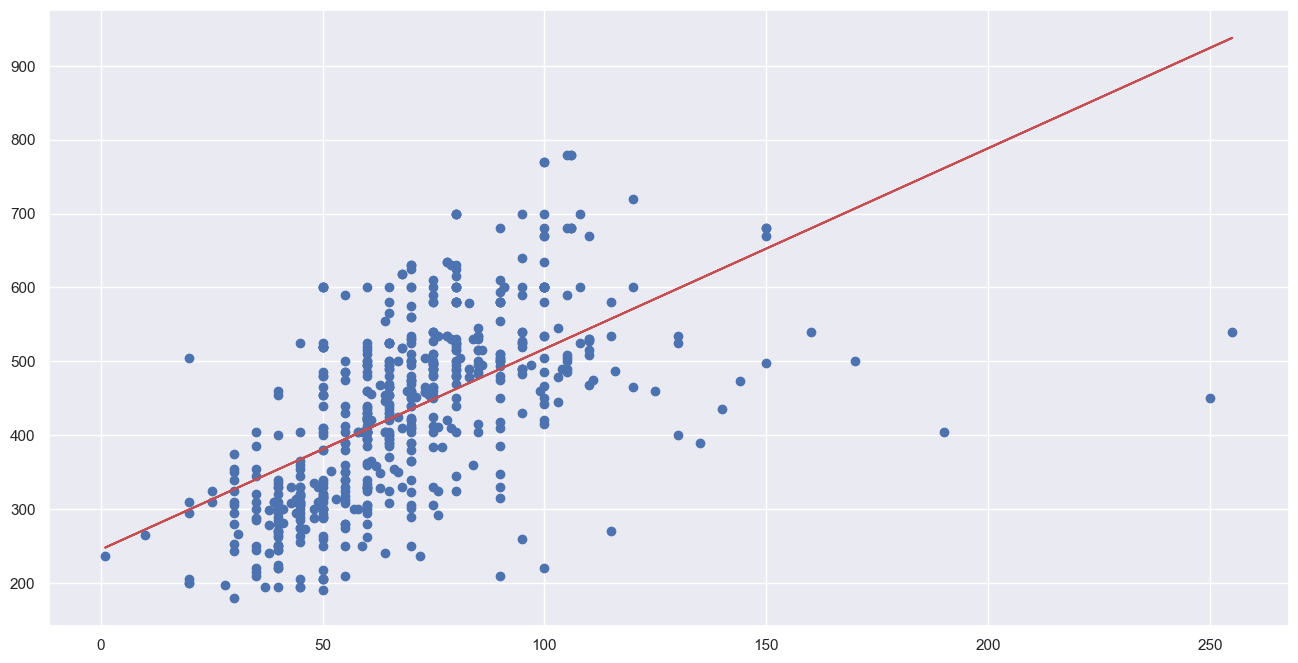

Explained Variance (R^2) 	: 0.4914319675664691
Mean Squared Error (MSE) 	: 6397.401764721523
Root Mean Squared Error (RMSE) 	: 79.98375938102386


In [14]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(hp_train, total_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Total values corresponding to HP Train
# regline_x= hp_train
# regline_y= linreg.intercept + linreg.coef_ * hp_train
total_train_pred = linreg.predict(hp_train)
total_test_pred = linreg.predict(hp_test)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(hp_train, total_train)
plt.plot(hp_train, total_train_pred, color = "r")
plt.show()

##Check how good the predictions are on the Test Set.    
##Metrics : Explained Variance and Mean Squared Error.
    
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(hp_test, total_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(total_test, total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# Regression with Random Train-Test Split

Split the Train and Test sets randomly, and perform Linear Regression.

Intercept of Regression 	: b =  [254.2542106]
Coefficients of Regression 	: a =  [[2.62869201]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3474761523769312
Mean Squared Error (MSE) 	: 9211.015402386796

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4672086591288981
Mean Squared Error (MSE) 	: 8056.0152068759



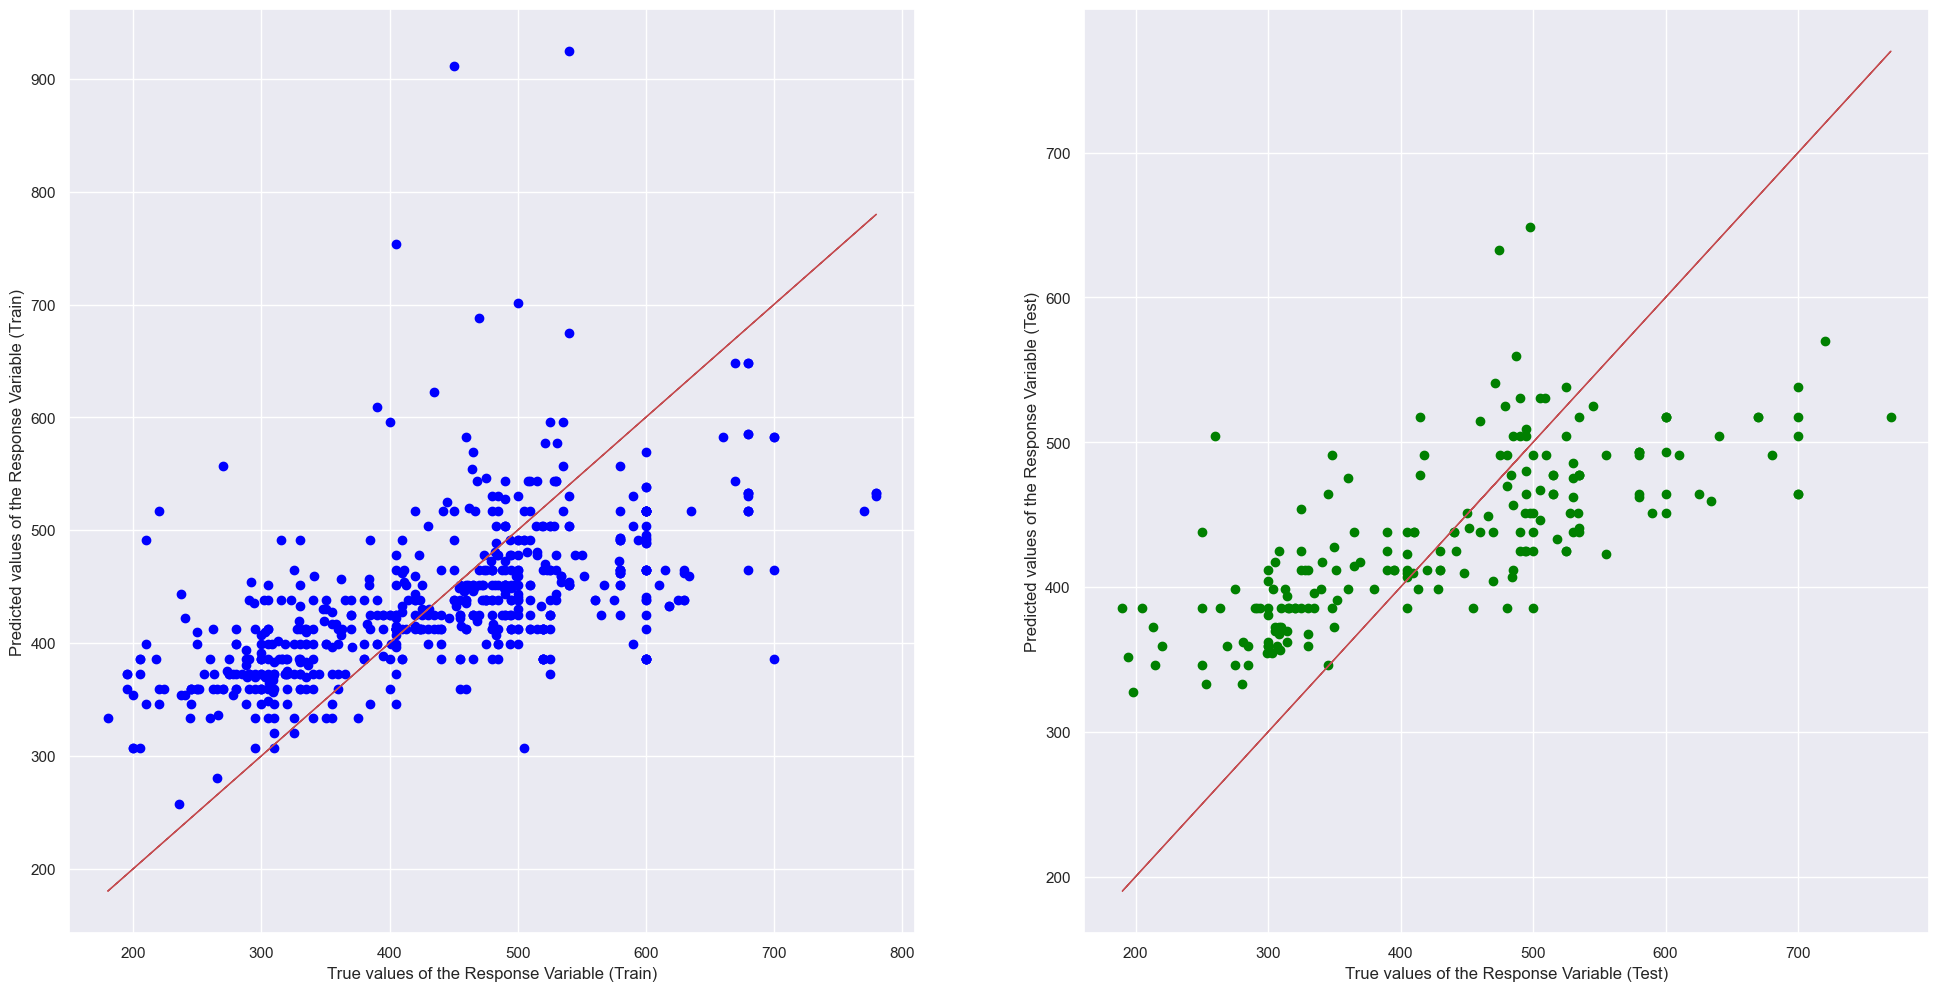

In [15]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
total = pd.DataFrame(pkmndata['Total'])   # Response
hp = pd.DataFrame(pkmndata['HP'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(hp, total, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


## Multi-Variate Linear Regression

Let us set up another Multi-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $a_4$ $\times$ Sp. Atk + $a_5$ $\times$ Sp. Def + $a_6$ $\times$ Speed + $b$  

Intercept of Regression 	: b =  [1.70530257e-13]
Coefficients of Regression 	: a =  [[1. 1. 1. 1. 1. 1.]]

  Predictors  Coefficients
0         HP           1.0
1     Attack           1.0
2    Defense           1.0
3    Sp. Atk           1.0
4    Sp. Def           1.0
5      Speed           1.0



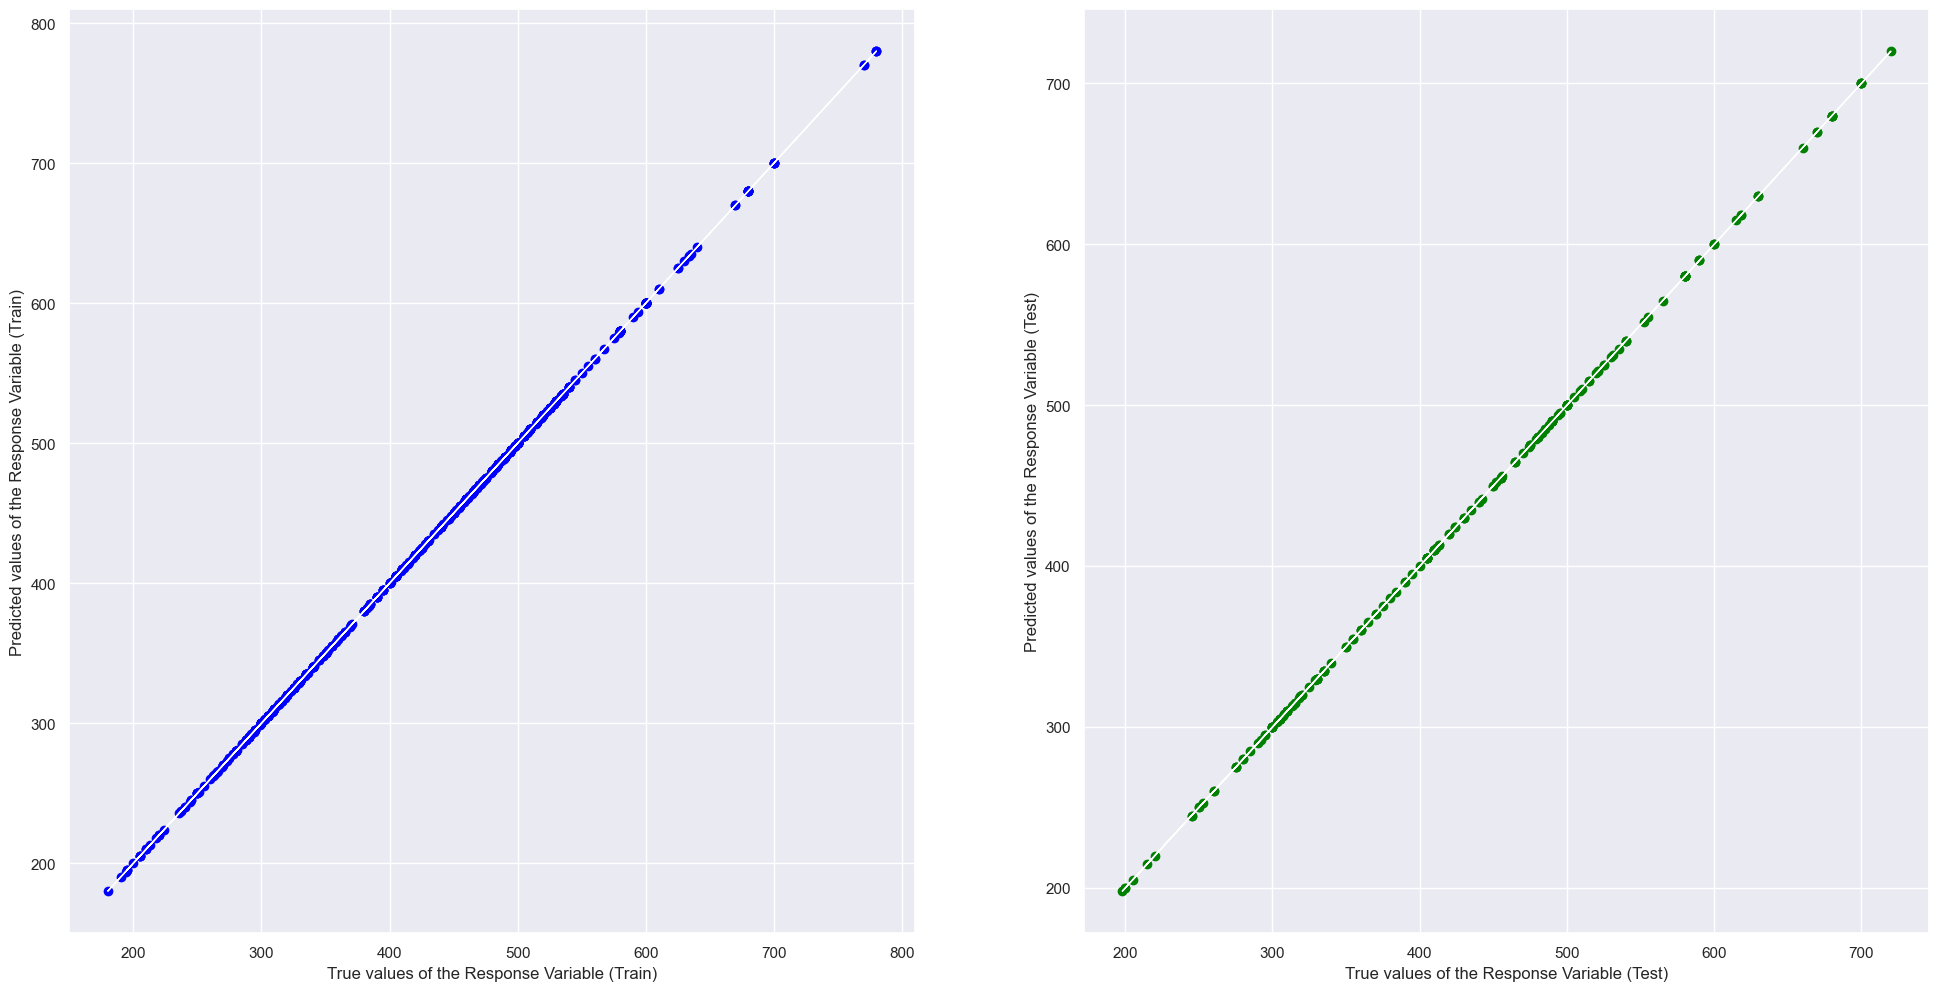

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 9.720449255587337e-27

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.0048951972812172e-26



In [16]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

---

## Prediction using a Regression Model

Once we have trained a Multi-Variate Regression Model, we may use it to predict **Total** for any particular Pokemon.   

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $b$  

Intercept of Regression 	: b =  [97.98586166]
Coefficients of Regression 	: a =  [[1.55397622 1.67997667 1.31431923]]

  Predictors  Coefficients
0         HP      1.553976
1     Attack      1.679977
2    Defense      1.314319



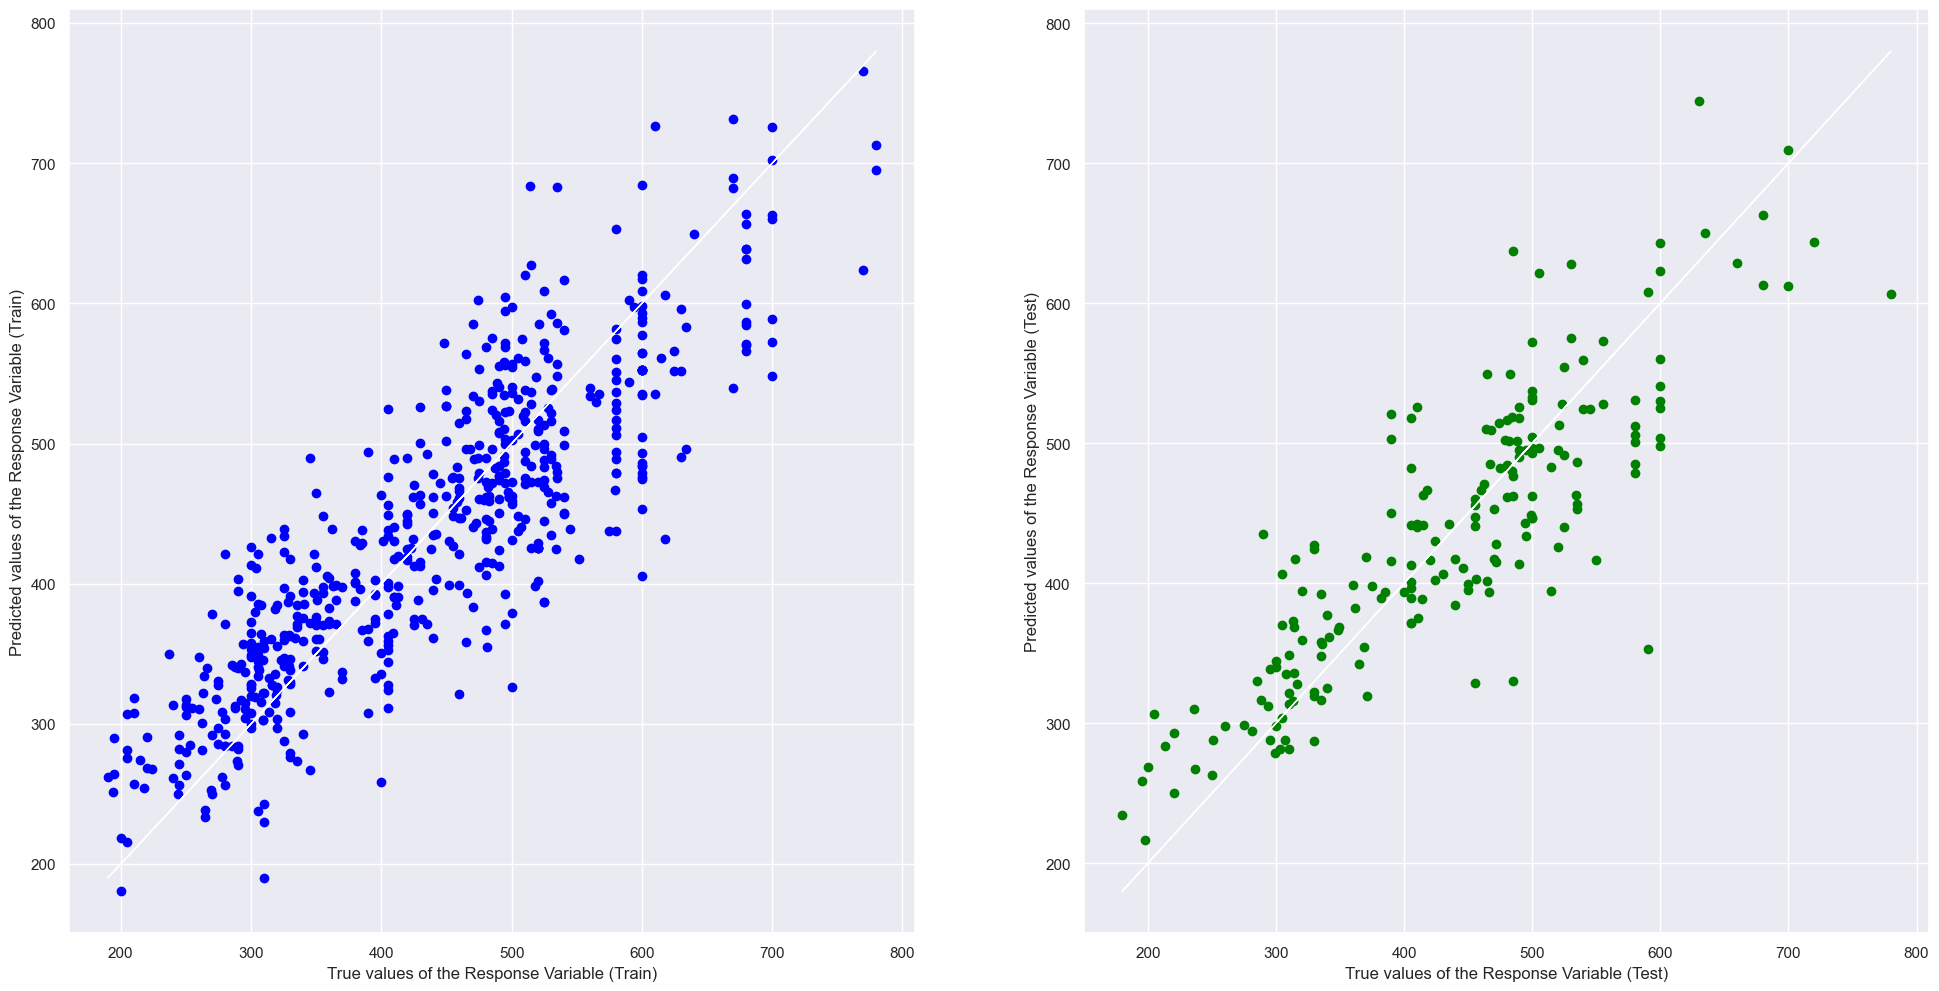

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7480679802885145
Mean Squared Error (MSE) 	: 3715.0020018090386

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7440984845690277
Mean Squared Error (MSE) 	: 3391.734749739738



In [26]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Extract Response and Predictors
predictors = ["HP", "Attack", "Defense"]

y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Prediction of Total

Let's predict the value of **Total** for a few specific Pokemons -- *Charizard*, *Snorlax* and *Vivillon* -- using the Regression Model derived above.   

In [27]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Charizard", "Snorlax", "Vivillon"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
734,666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6,False


In [28]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[462.83094726],
       [616.85024079],
       [375.37870782]])

In [29]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Total"]], y_pred], axis = 1)

y_errs = 100 * abs(pkmndata_acc["Total"] - pkmndata_acc["PredTotal"]) / pkmndata_acc["Total"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_acc, y_errs], axis = 1)

pkmndata_acc

,Name,Total,PredTotal,Error
6,Charizard,534,462.830947,13.327538
155,Snorlax,540,616.850241,14.231526
734,Vivillon,411,375.378708,8.666981


### Prediction Interval

The confidence on Prediction depends on the Distribution and Deviation of the Errors in Prediction.    
We obtain the Mean Squared Error on the Train Set while fitting/training the Linear Regression Model.    

The Standard Error of Prediction may be estimated as $StdE = \sqrt{\frac{n}{n-2} MSE}$ from the Train Set.

In [30]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 3715.0
Pred Standard Error (SE) 	: 61.05


In Prediction, we assume a Gaussian (Normal) Distribution for Predictions Errors.    
The `95%` Prediction Interval for any data point is given by $Prediction \pm 1.96 \times StdE$    
The `99%` Prediction Interval for any data point is given by $Prediction \pm 2.58 \times StdE$

In [31]:
y_95l = pd.DataFrame(pkmndata_acc["PredTotal"] - 1.96*StdE_pred).rename(columns = {"PredTotal" : "95 Lower"})
y_95u = pd.DataFrame(pkmndata_acc["PredTotal"] + 1.96*StdE_pred).rename(columns = {"PredTotal" : "95 Upper"})
y_99l = pd.DataFrame(pkmndata_acc["PredTotal"] - 2.58*StdE_pred).rename(columns = {"PredTotal" : "99 Lower"})
y_99u = pd.DataFrame(pkmndata_acc["PredTotal"] + 2.58*StdE_pred).rename(columns = {"PredTotal" : "99 Upper"})

pkmndata_int = pd.concat([pkmndata_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
pkmndata_int

,Name,Total,PredTotal,Error,95 Lower,95 Upper,99 Lower,99 Upper
6,Charizard,534,462.830947,13.327538,343.167742,582.494152,305.315096,620.346799
155,Snorlax,540,616.850241,14.231526,497.187036,736.513446,459.334389,774.366092
734,Vivillon,411,375.378708,8.666981,255.715503,495.041913,217.862856,532.894559


---

## Simple Decision Tree

We will start by setting up a simple Classification Problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total**    

Extract the variables and the associated data as a Pandas `DataFrame`.

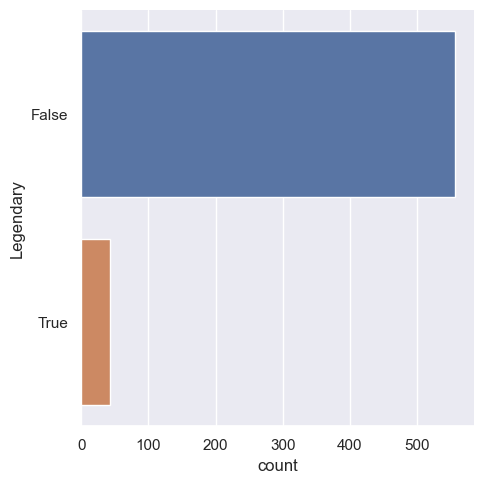

In [34]:
legnd = pd.DataFrame(pkmndata['Legendary'])  # Response
total = pd.DataFrame(pkmndata['Total'])      # Predictor

# Train Set : 600 samples
total_train = pd.DataFrame(total[:600])
legnd_train = pd.DataFrame(legnd[:600])

# Test Set : 200 samples
total_test = pd.DataFrame(total[-200:])
legnd_test = pd.DataFrame(legnd[-200:])

# Count Plot for Legendary Train
sb.catplot(y = "Legendary", data = legnd_train, kind = "count")

<AxesSubplot:>

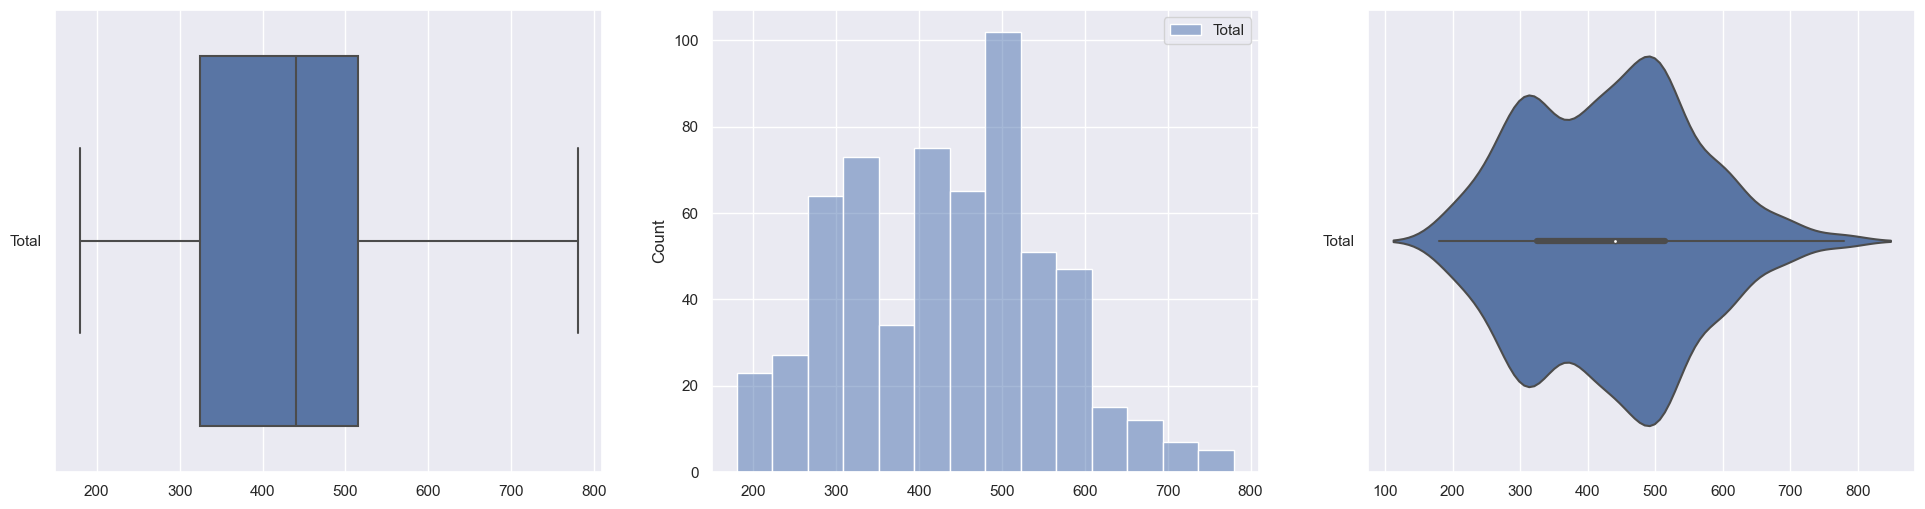

In [35]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = total_train, orient = "h", ax = axes[0])
sb.histplot(data = total_train, ax = axes[1])
sb.violinplot(data = total_train, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Total', ylabel='Legendary'>

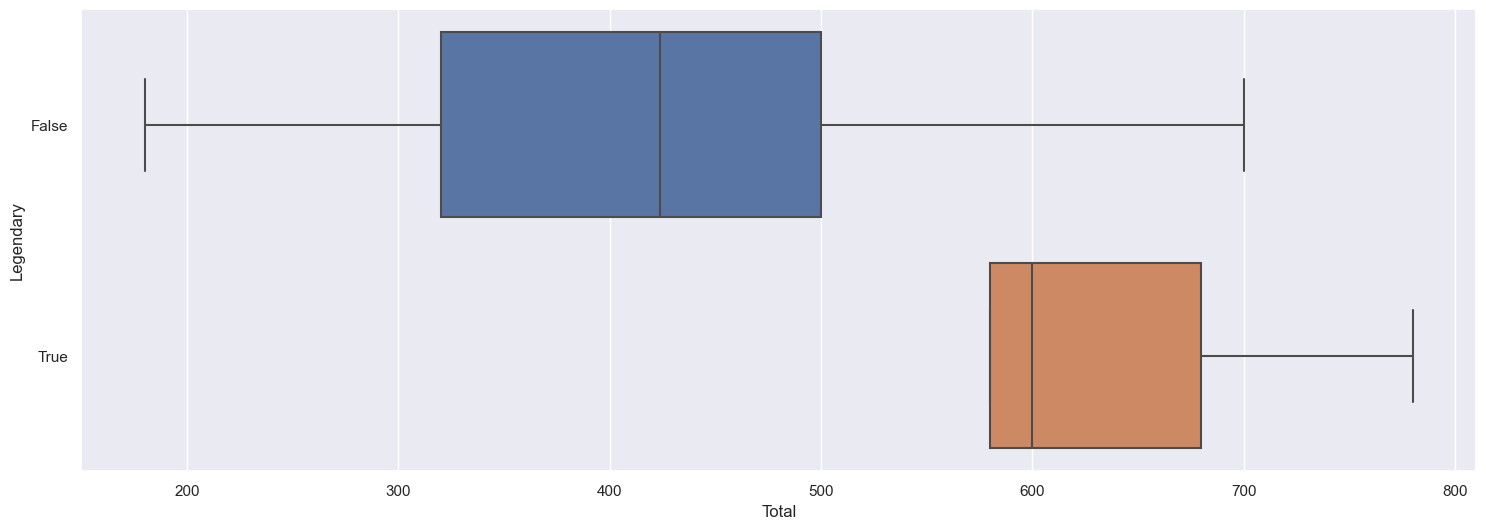

In [36]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([total_train, legnd_train], axis = 1).reindex(total_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Total", y = "Legendary", data = trainDF, orient = "h")

### Decision Tree in Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [59]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `total_train` as *Predictor* and `legnd_train` as *Response*.

[Text(0.4, 0.8333333333333334, 'Total <= 579.5\ngini = 0.133\nsamples = 600\nvalue = [557, 43]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 516\nvalue = [516, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 655.0\ngini = 0.5\nsamples = 84\nvalue = [41, 43]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.48\nsamples = 60\nvalue = [36, 24]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.33\nsamples = 24\nvalue = [5, 19]\nclass = Legendary')]

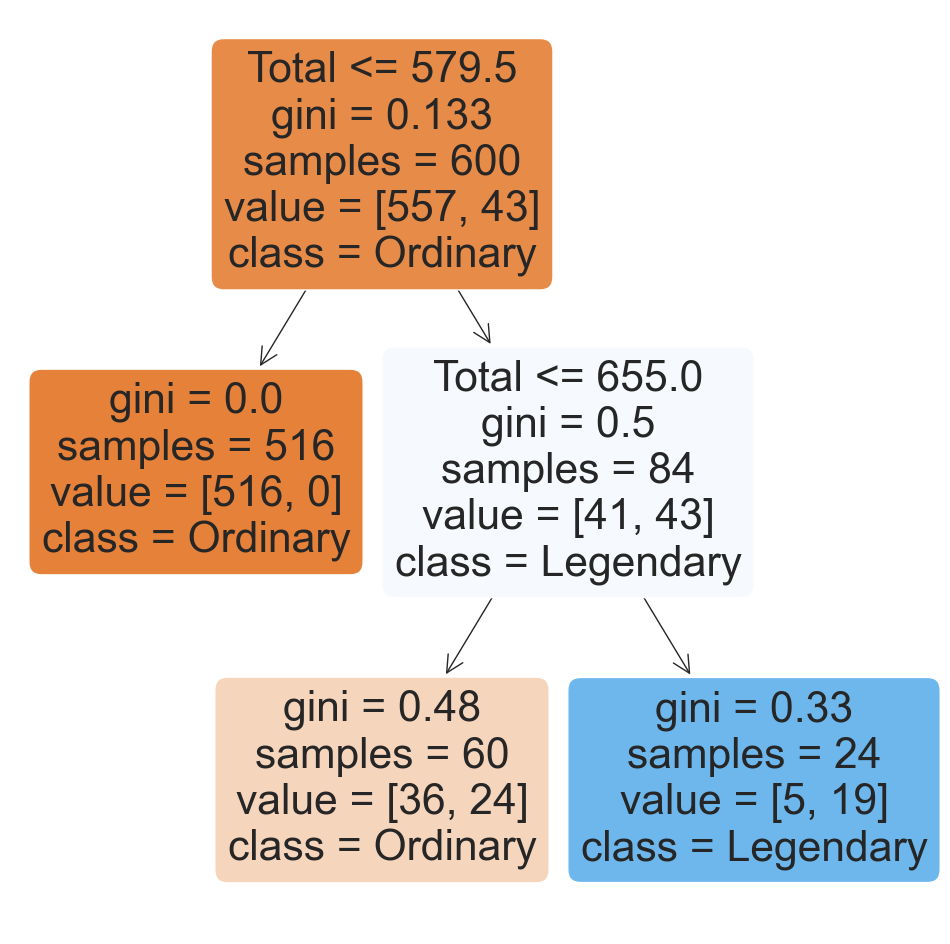

In [60]:
# Train the Decision Tree Classifier model
dectree.fit(total_train, legnd_train)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["Ordinary","Legendary"])

### Goodness of Fit of the Model
Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.9516666666666667


<AxesSubplot:>

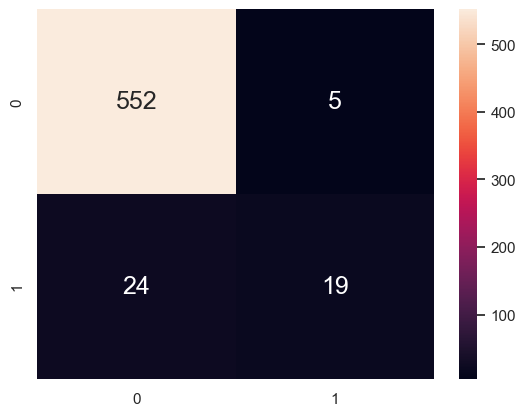

In [61]:
# Predict Legendary corresponding to Total Train
legnd_train_pred = dectree.predict(total_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_train, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Check how good the predictions are on the Test Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.935


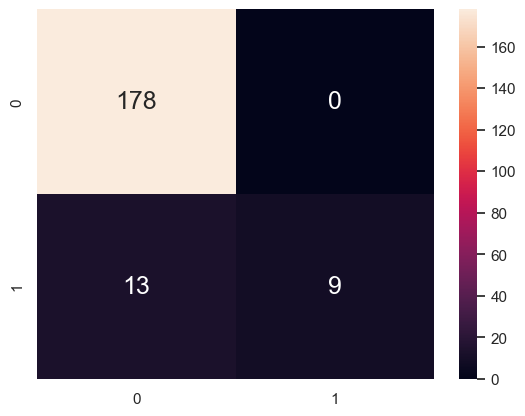

In [41]:
# Predict Legendary corresponding to Total Test
legnd_test_pred = dectree.predict(total_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_test, legnd_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_test, legnd_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})# Predict Legendary corresponding to Total Test
legnd_test_pred = dectree.predict(total_test)

### Classification Tree with Random Train-Test Split

Split the Train and Test sets randomly, and perform Classification.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.945

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.955



<AxesSubplot:>

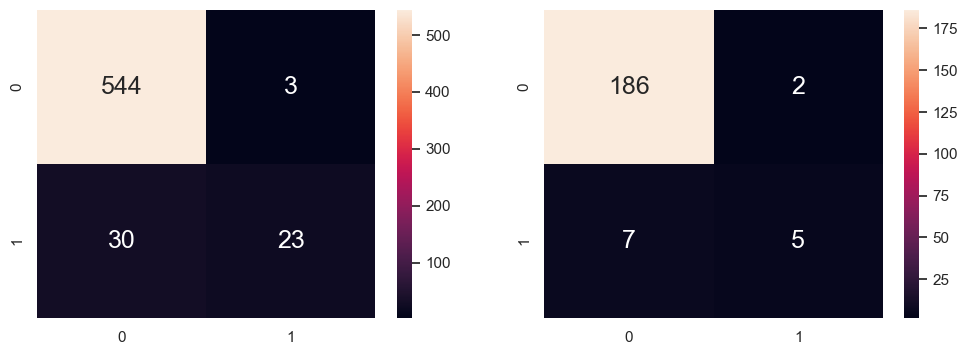

In [112]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['Legendary'])   # Response
total = pd.DataFrame(pkmndata['Total'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.4, 0.8333333333333334, 'Total <= 579.5\ngini = 0.161\nsamples = 600\nvalue = [547, 53]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 511\nvalue = [511, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 650.0\ngini = 0.482\nsamples = 89\nvalue = [36, 53]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.499\nsamples = 63\nvalue = [33, 30]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.204\nsamples = 26\nvalue = [3, 23]\nclass = Legendary')]

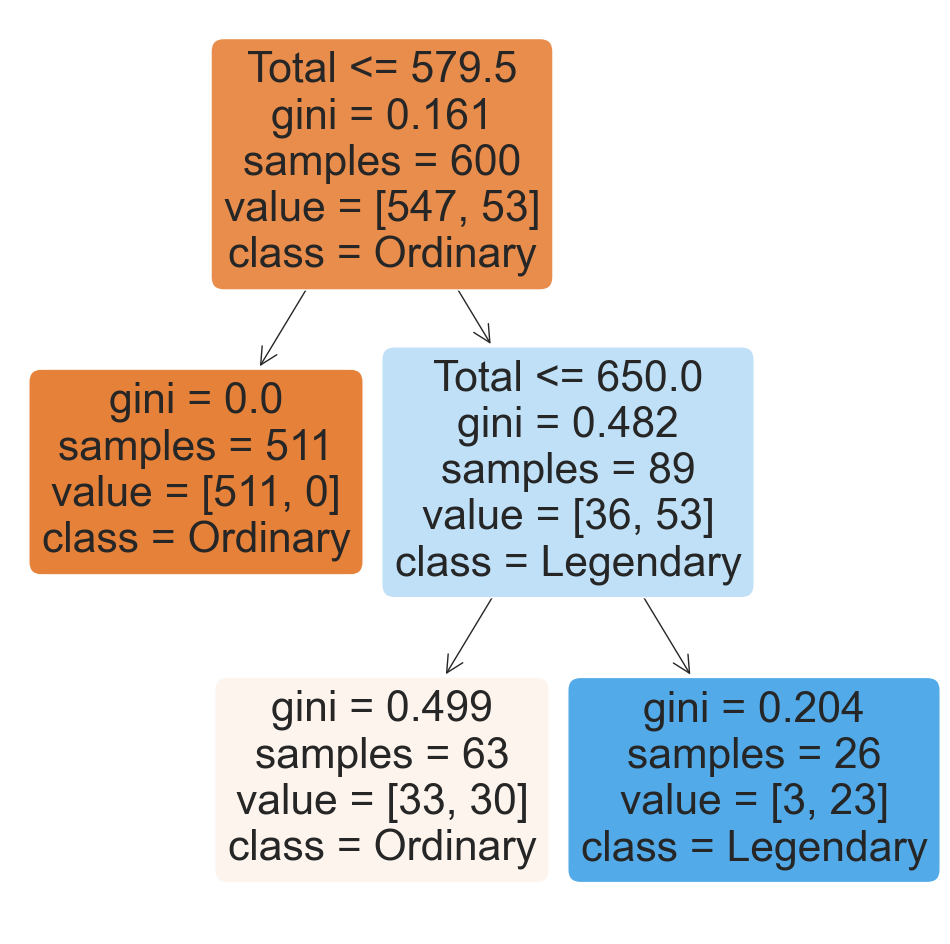

In [113]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["Ordinary","Legendary"])

---

## Multi-Variate Classification Tree

We will start by setting up a Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [114]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Legendary"])
X = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (600, 1) (600, 4)
Test Set  : (200, 1) (200, 4)


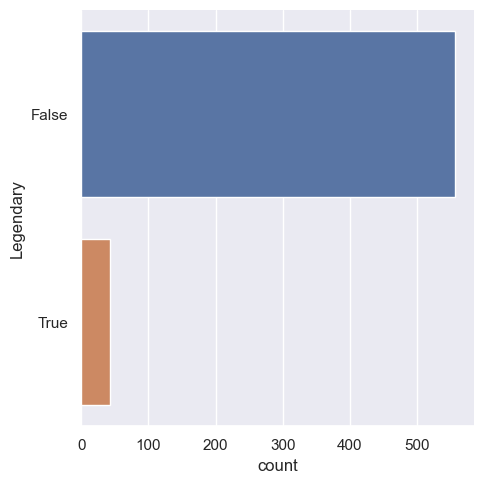

In [115]:
# Draw the distribution of Response
sb.catplot(y = "Legendary", data = legnd_train, kind = "count")

KeyError: 0

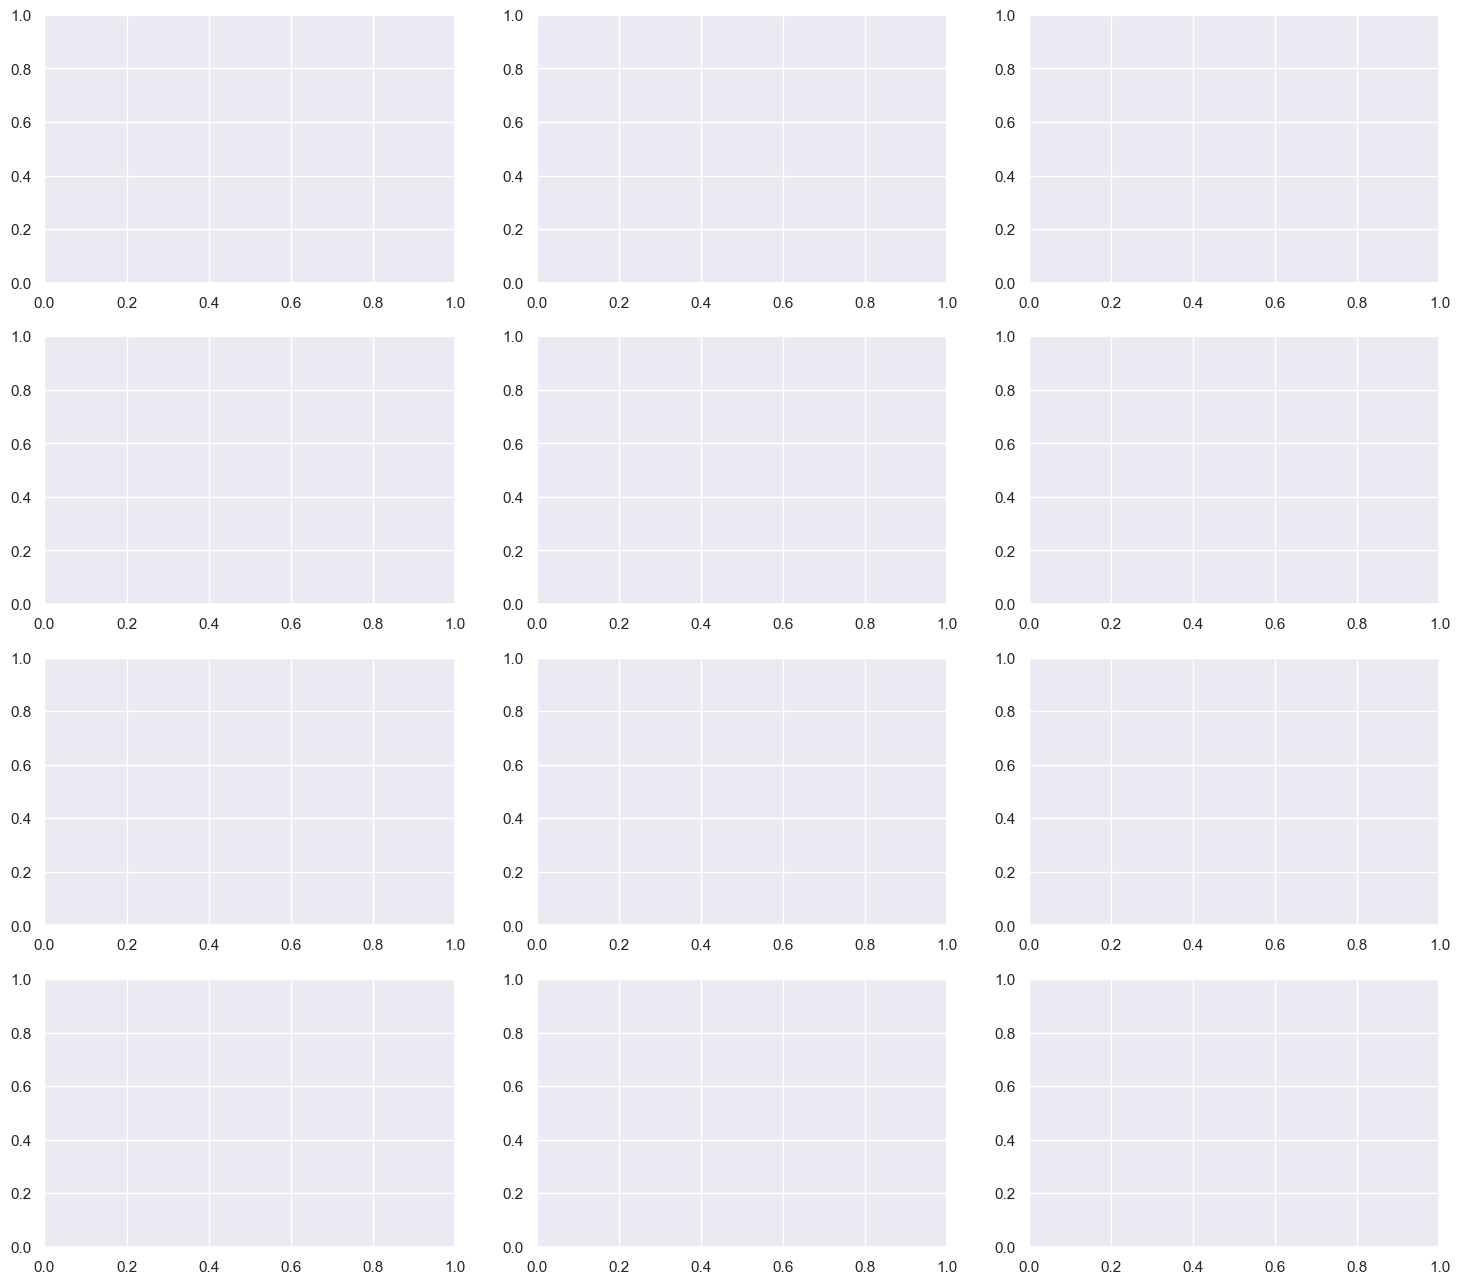

In [116]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


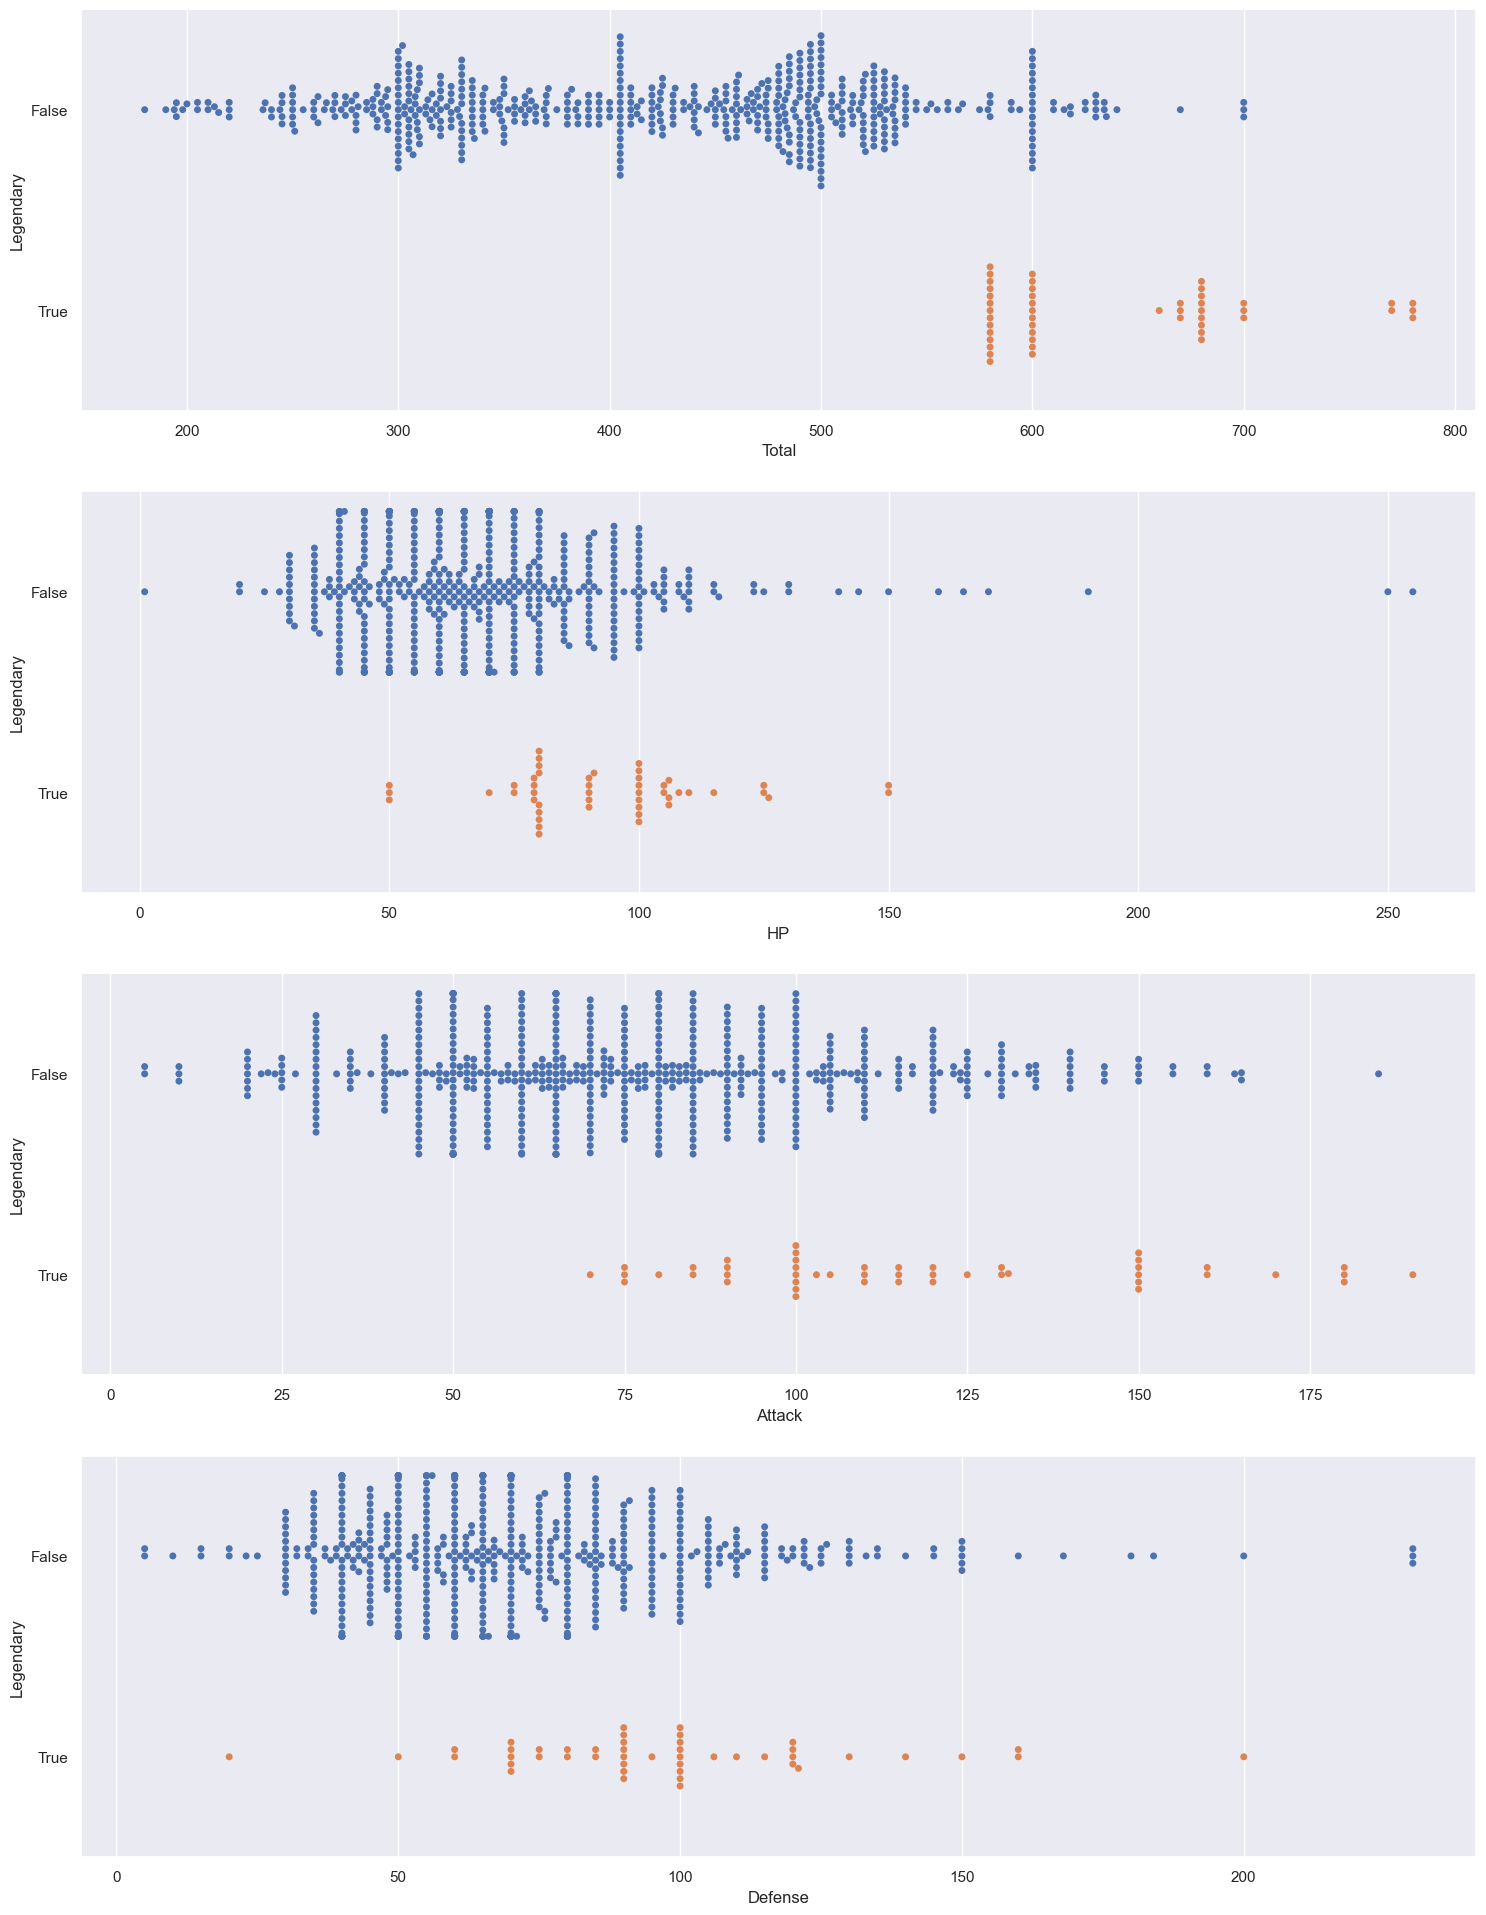

In [117]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(4, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "Legendary", data = trainDF, orient = "h", ax = axes[count])
    count += 1

### Classification Tree in Scikit-Learn

[Text(0.4, 0.8333333333333334, 'Total <= 579.5\ngini = 0.144\nsamples = 600\nvalue = [553, 47]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 511\nvalue = [511, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 650.0\ngini = 0.498\nsamples = 89\nvalue = [42, 47]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.482\nsamples = 64\nvalue = [38, 26]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.269\nsamples = 25\nvalue = [4, 21]\nclass = Legendary')]

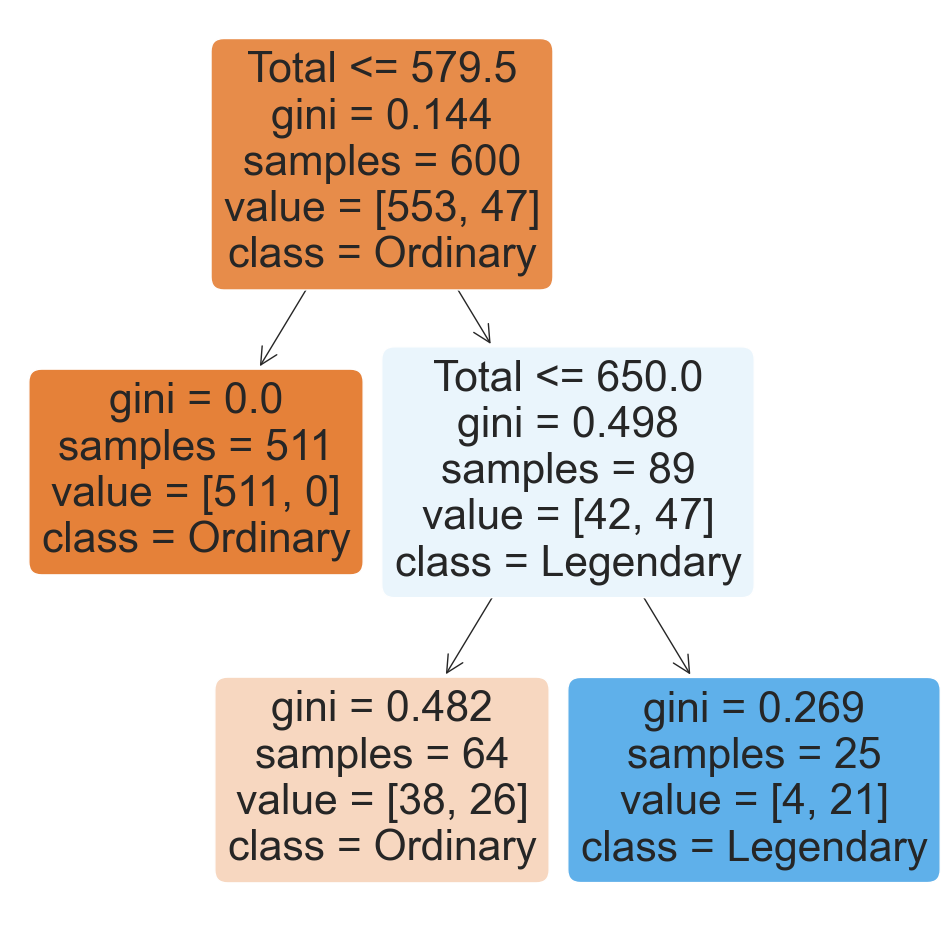

In [118]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])

### Goodness of Fit of the Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.95

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.94



<AxesSubplot:>

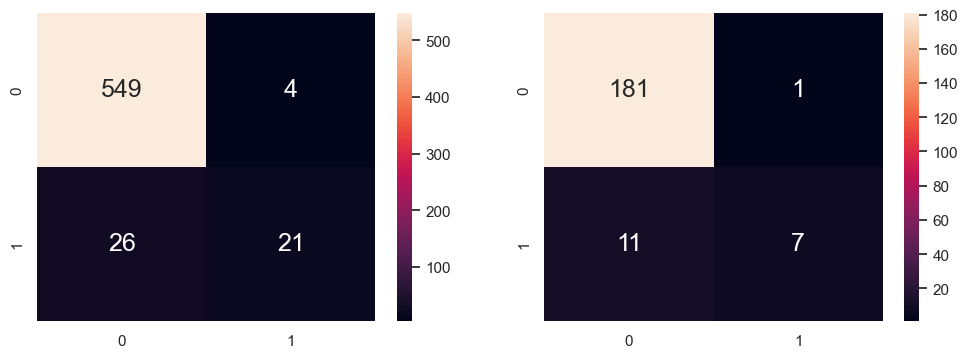

In [119]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

---

## Multi-Variate Classification Tree

Let us set up another Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.95

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.94



[Text(0.4, 0.8333333333333334, 'Total <= 579.5\ngini = 0.153\nsamples = 600\nvalue = [550, 50]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 512\nvalue = [512, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 650.0\ngini = 0.491\nsamples = 88\nvalue = [38, 50]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.492\nsamples = 62\nvalue = [35, 27]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.204\nsamples = 26\nvalue = [3, 23]\nclass = Legendary')]

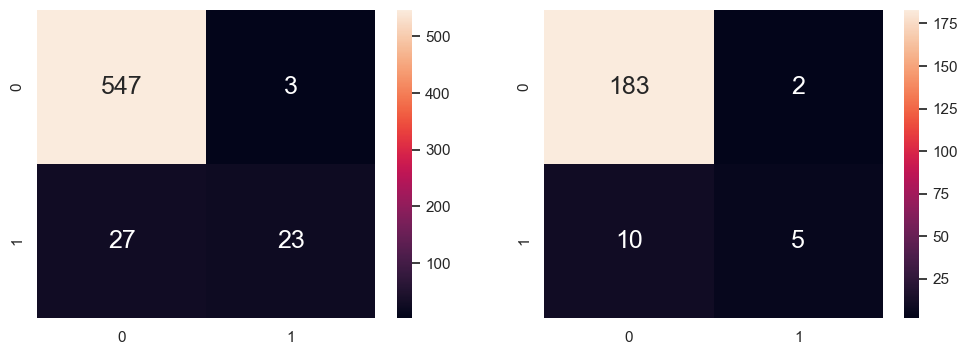

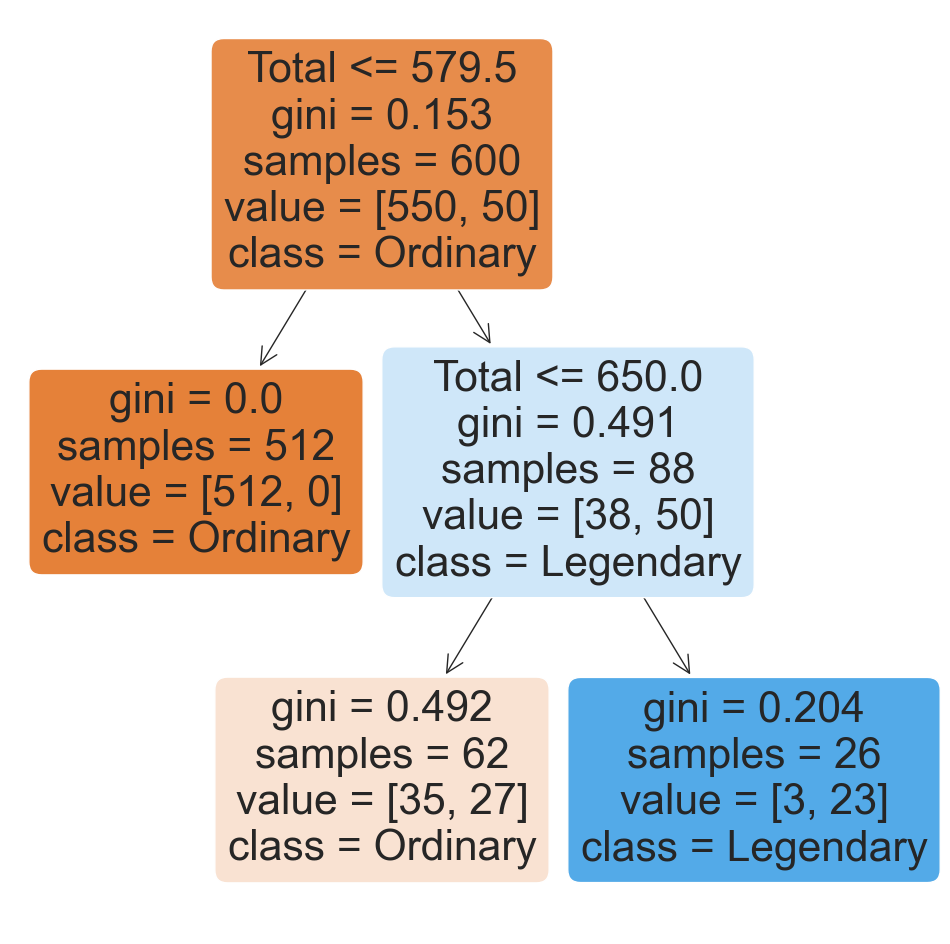

In [120]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

y = pd.DataFrame(pkmndata['Legendary'])
X = pd.DataFrame(pkmndata[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])

### Prediction of Legendary

Let's predict the value of **Legendary** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [121]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [122]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array([False,  True,  True])

In [123]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredLegend"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Legendary"]], y_pred], axis = 1)

pkmndata_acc

,Name,Legendary,PredLegend
15,Butterfree,False,False
162,Mewtwo,True,True
545,GiratinaOrigin Forme,True,True


### Prediction of Class Probabilities

In case of any Classification Model, we should check the Class Probabilities along with the final Class Predictions.

In [124]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
y_prob

array([[1.   , 0.   ],
       [0.115, 0.885],
       [0.115, 0.885]])

In [125]:
# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["ProbLegend"], index = pkmndata_pred.index)
pkmndata_conf = pd.concat([pkmndata_acc, y_prob], axis = 1)

pkmndata_conf

,Name,Legendary,PredLegend,ProbLegend
15,Butterfree,False,False,0.000000
162,Mewtwo,True,True,0.884615
545,GiratinaOrigin Forme,True,True,0.884615


---

## Multi-Class Classification Tree

Let us set up a Multi-Class Classification problem.   

Response Variable : **Type 1**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

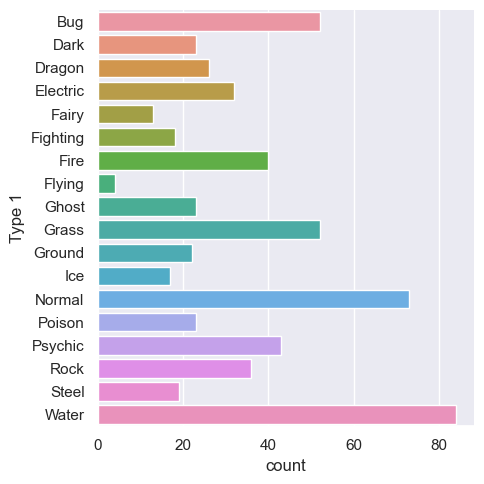

In [126]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

y = pd.DataFrame(pkmndata['Type 1'].astype('category'))
X = pd.DataFrame(pkmndata[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Type 1", data = y_train, kind = "count")

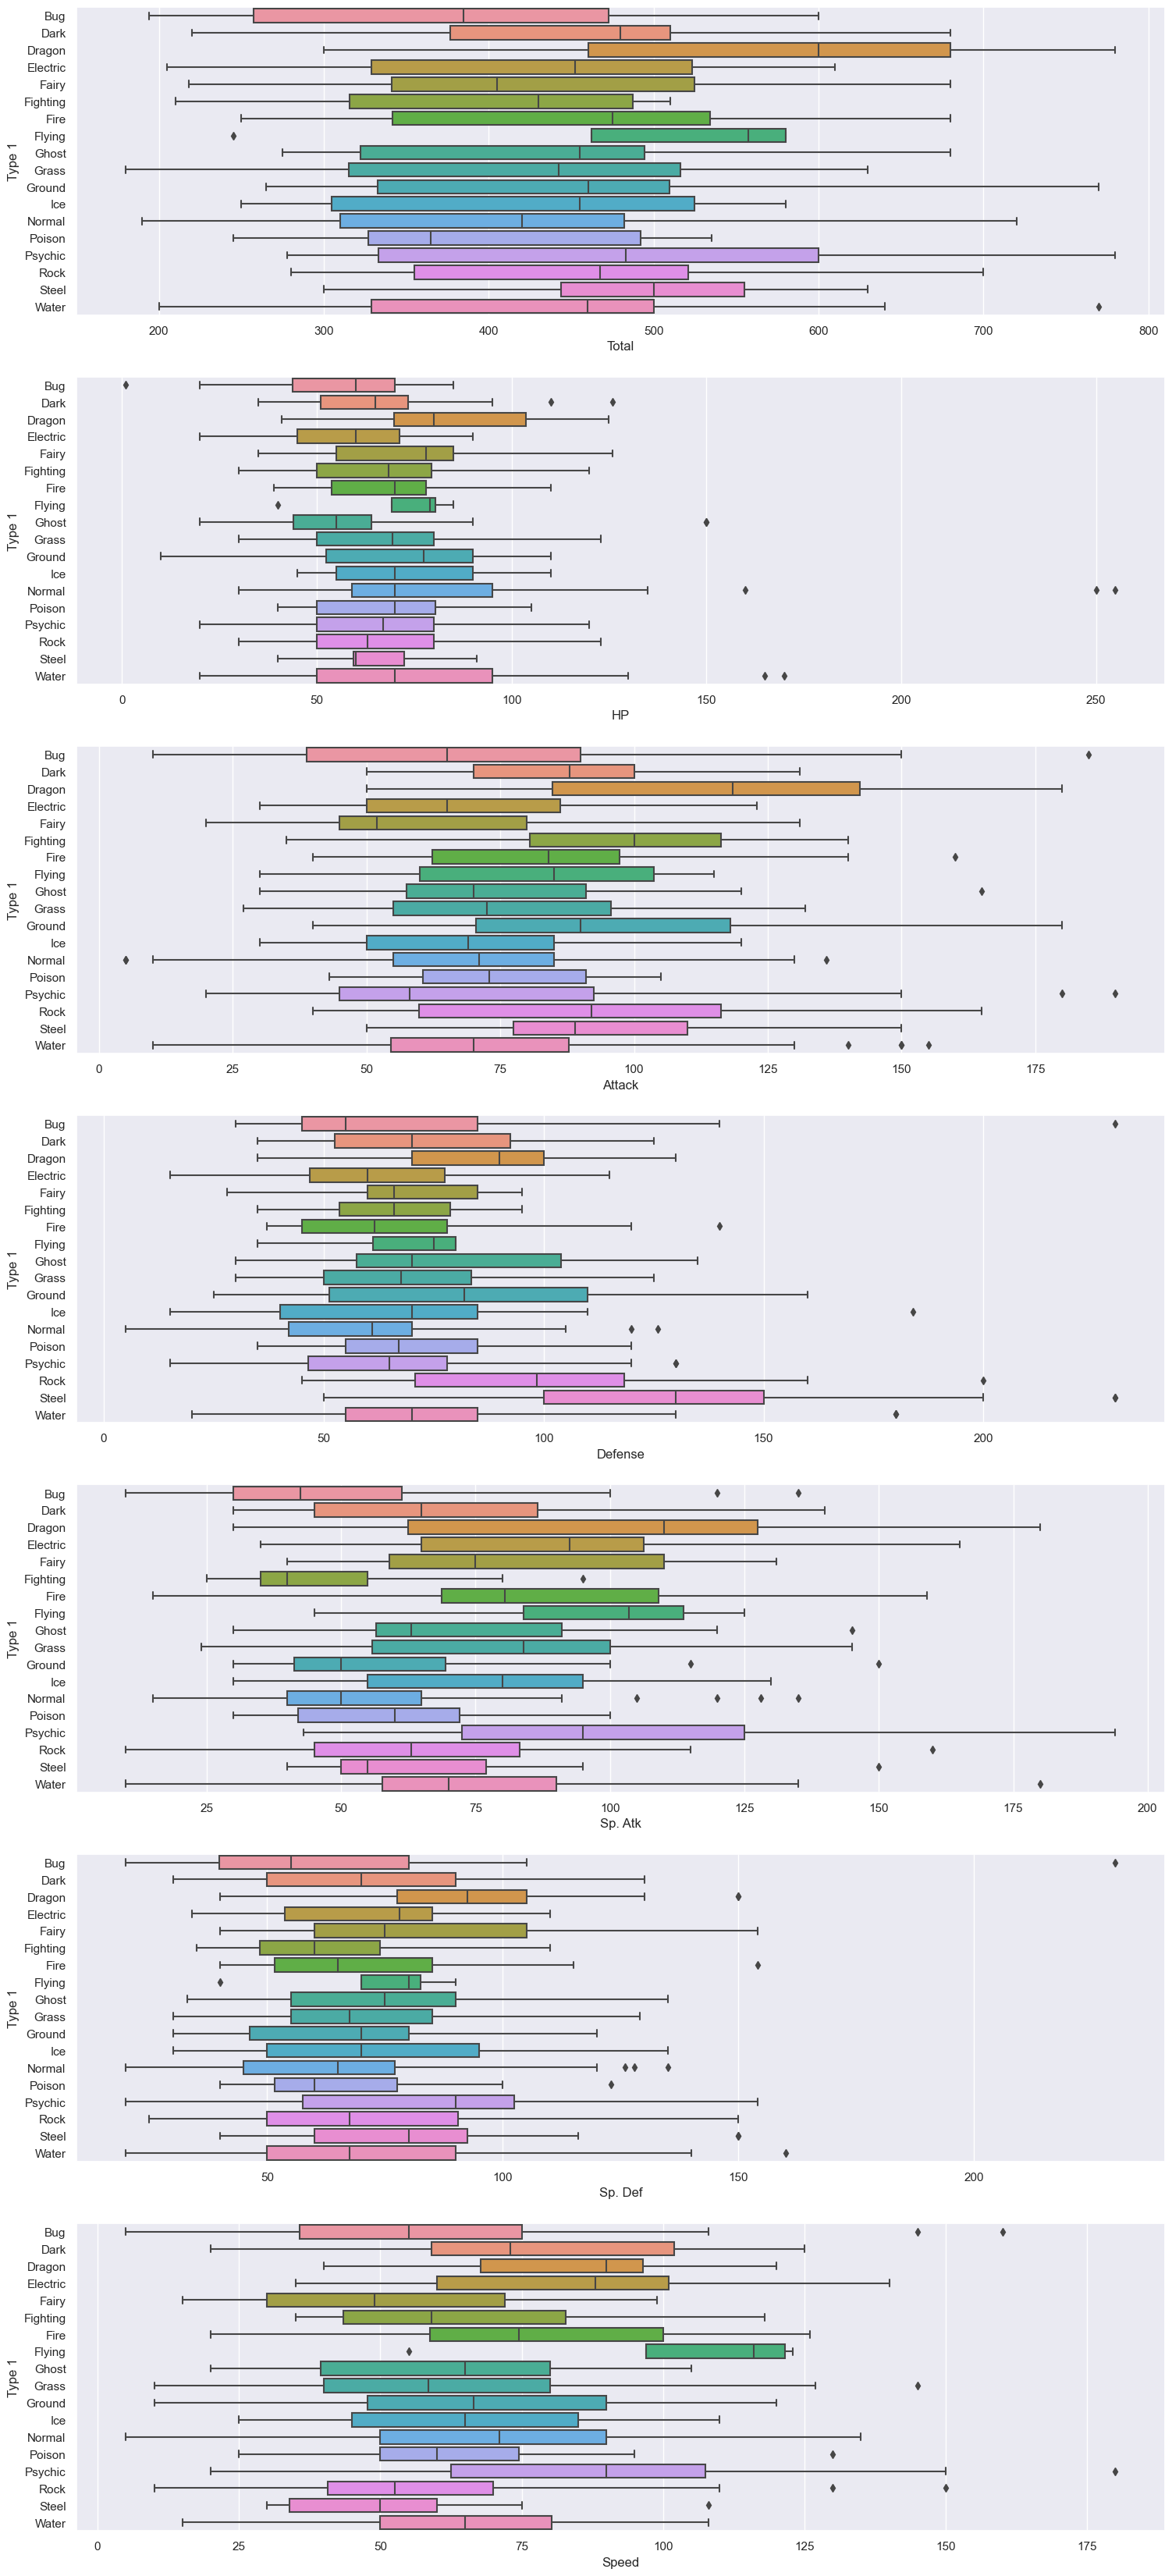

In [127]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Type 1", data = trainDF, orient = "h", ax = axes[count])
    count += 1

#### Training the Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.2733333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.165



<AxesSubplot:>

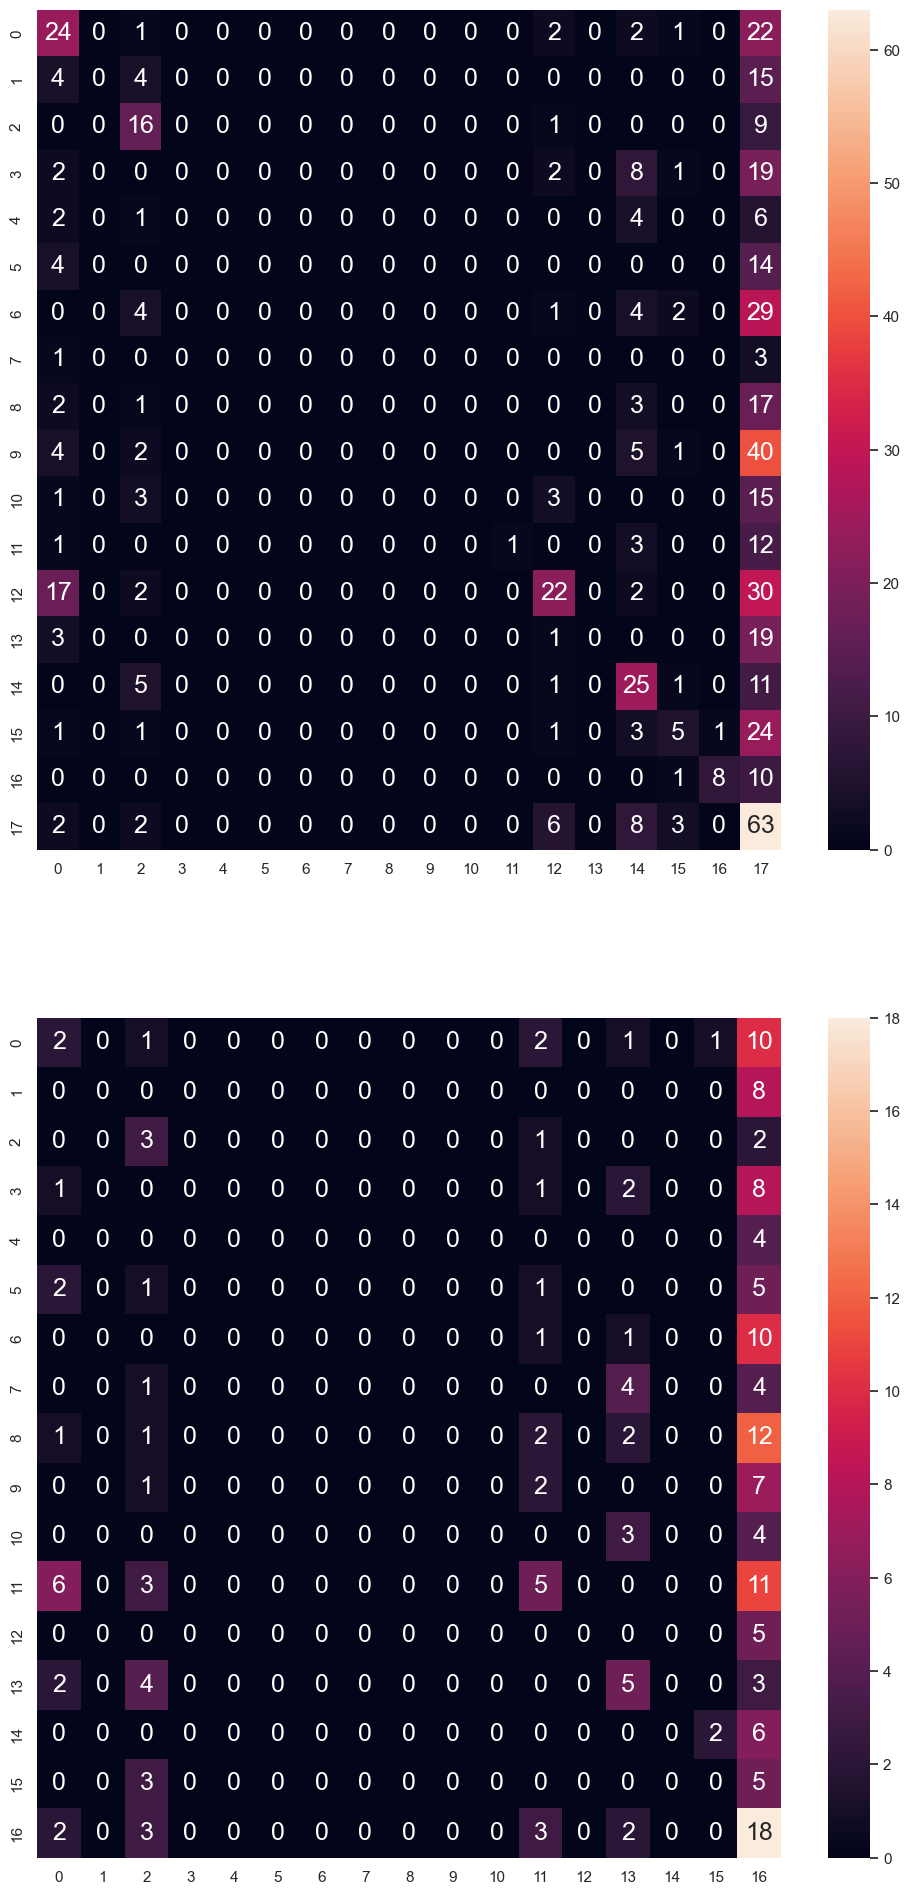

In [128]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Prediction of Type 1

Let's predict the value of **Type 1** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [129]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [130]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['Psychic', 'Psychic', 'Dragon'], dtype=object)

In [131]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Type 1"]], y_pred], axis = 1)

pkmndata_acc

,Name,Type 1,PredType
15,Butterfree,Bug,Psychic
162,Mewtwo,Psychic,Psychic
545,GiratinaOrigin Forme,Ghost,Dragon


In [132]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.043 0.    0.    0.087 0.087 0.    0.087 0.    0.065 0.087 0.    0.022
  0.043 0.    0.239 0.065 0.    0.174]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.125 0.    0.
  0.    0.    0.875 0.    0.    0.   ]
 [0.024 0.095 0.381 0.    0.024 0.    0.095 0.    0.024 0.048 0.071 0.
  0.048 0.    0.119 0.024 0.    0.048]]
